1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

Poin yang perlu diperhatikan: 
mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness, dan kurtosis. 

In [13]:
import pandas as pd

# Read the data from weather.csv
data = pd.read_csv('weather.csv')

# Display the original data
print("Original Data:")
print(data.head())  # Display the first few rows of the original data

# Drop rows with any NaN values
data_cleaned = data.dropna()

# Calculate descriptive statistics for all columns on cleaned data
statistics = data_cleaned.describe(include='all')

# Print the statistics
print("\nDescriptive Statistics (Cleaned Data):")
print(statistics)


Original Data:
   Unnamed: 0  Temperature   Humidity  Precipitation  Wind_Speed  \
0           0    26.308998  71.457157       7.509076   10.923478   
1           1    23.032419  69.672088       4.220767   14.982321   
2           2    20.742818  86.053687       9.199037    9.396453   
3           3    28.553441  74.641928      13.268281   25.542511   
4           4    27.235507  62.400464      17.202971   13.997597   

   Cloud_Coverage Weather_Type Wind_Direction     Pressure  UV_Index  \
0       64.494316        Rainy           West  1093.875521  5.902521   
1       54.383351        Sunny           East   965.291716  9.047888   
2       66.051994        Sunny           East   905.728473  1.423866   
3       57.928168        Sunny           West   980.591057  5.918923   
4       39.379039        Sunny          South   913.286310  3.834512   

   Air_Quality  Visibility  
0    72.925943   18.509121  
1    64.649823   19.693711  
2    60.461165   11.382937  
3    73.977161   11.362726 

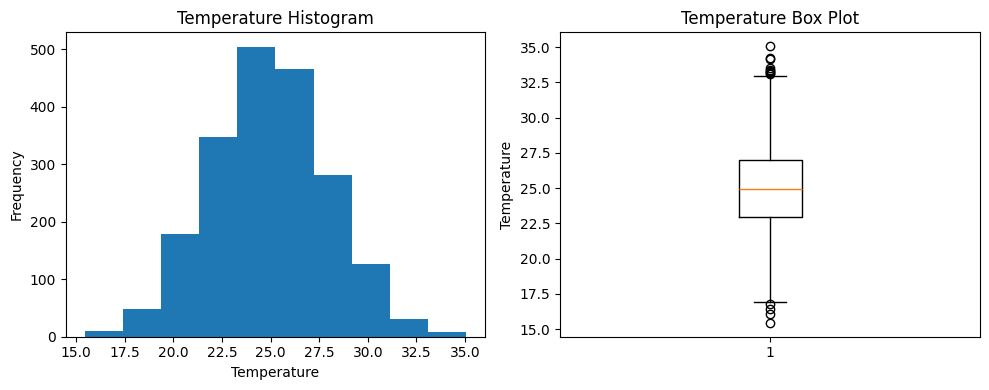

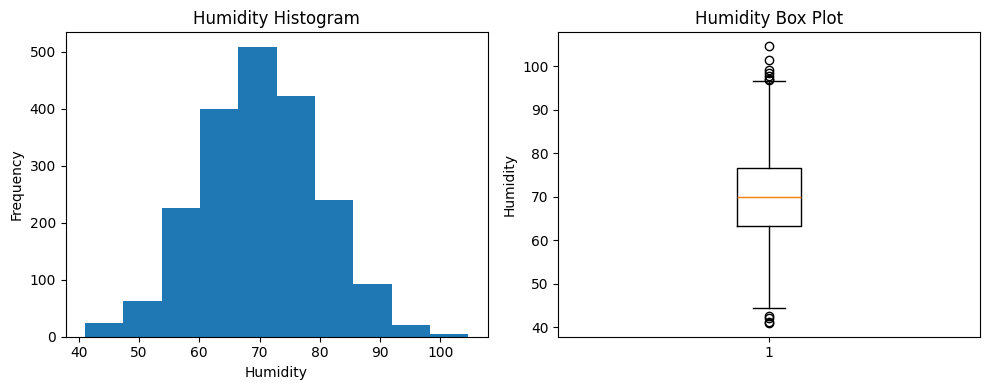

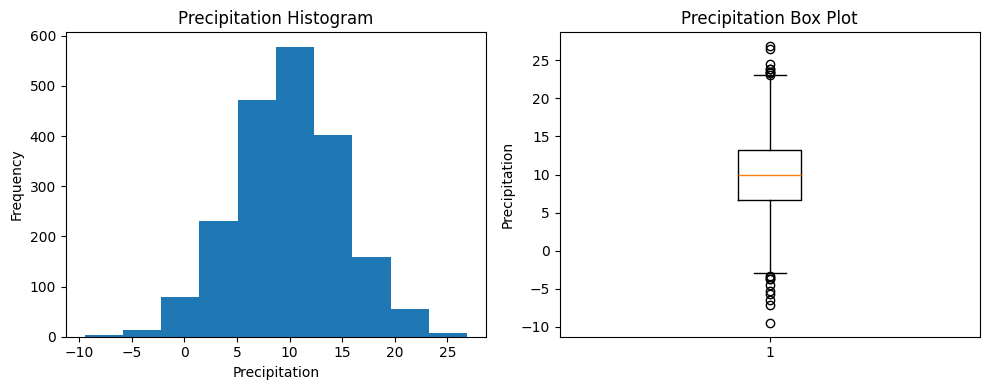

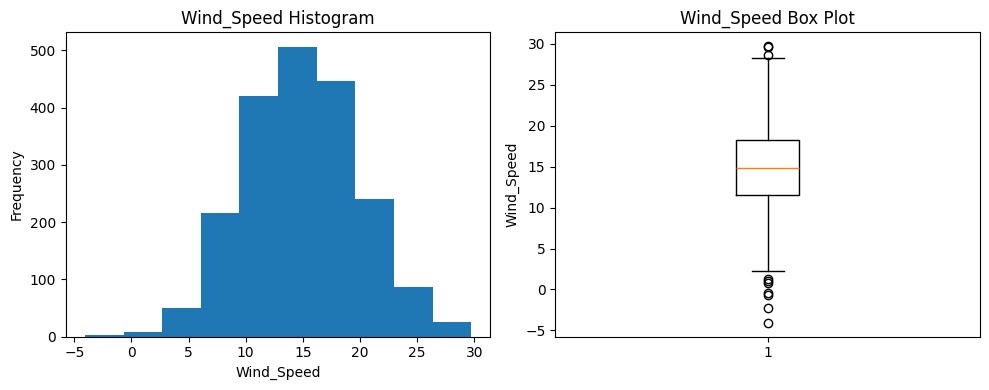

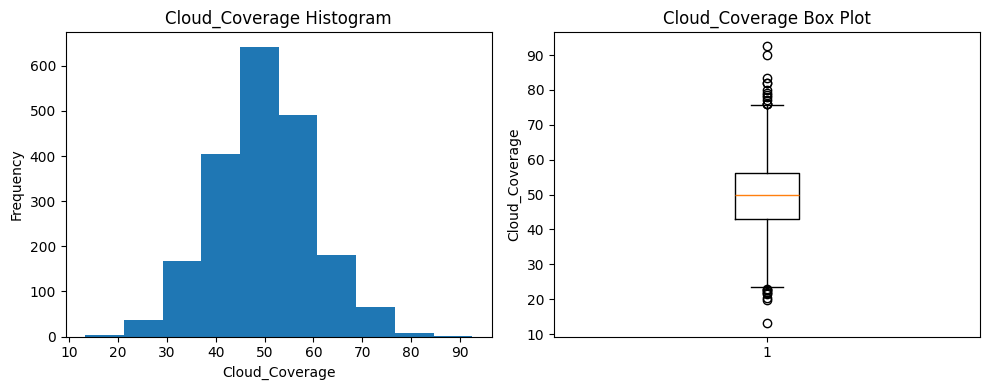

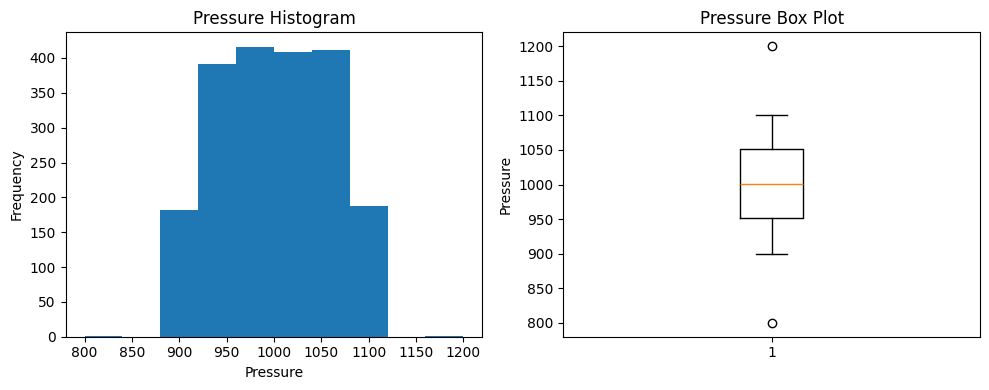

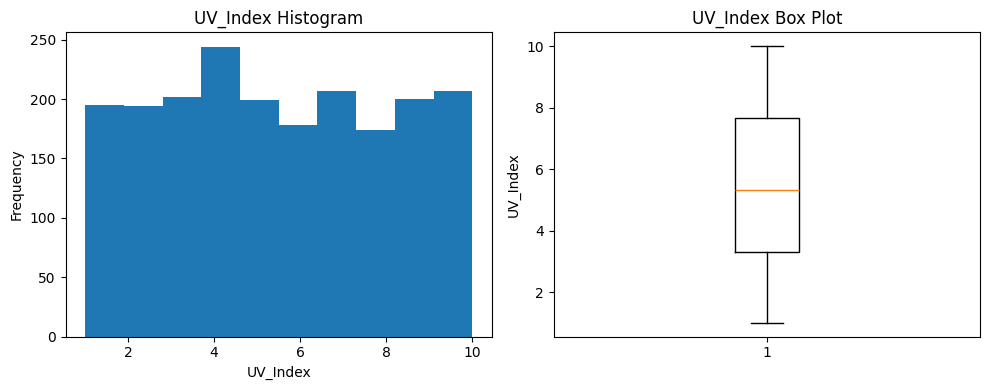

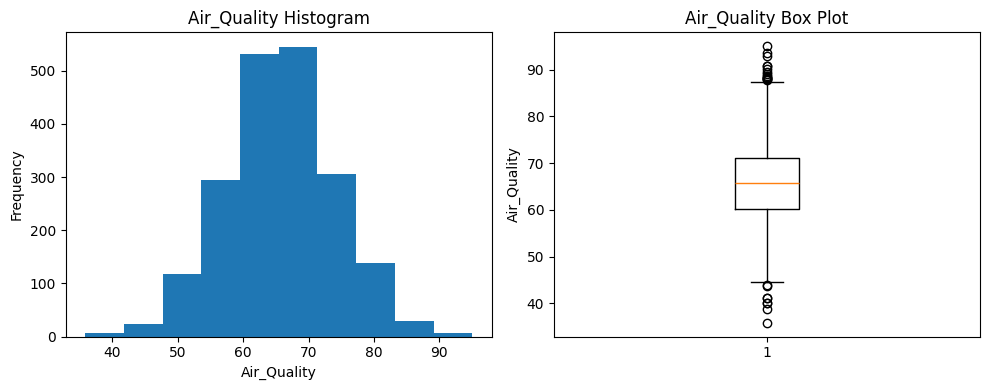

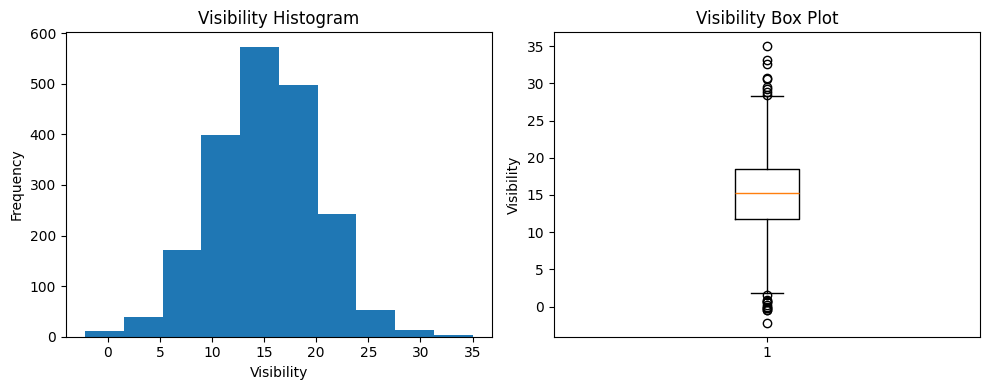

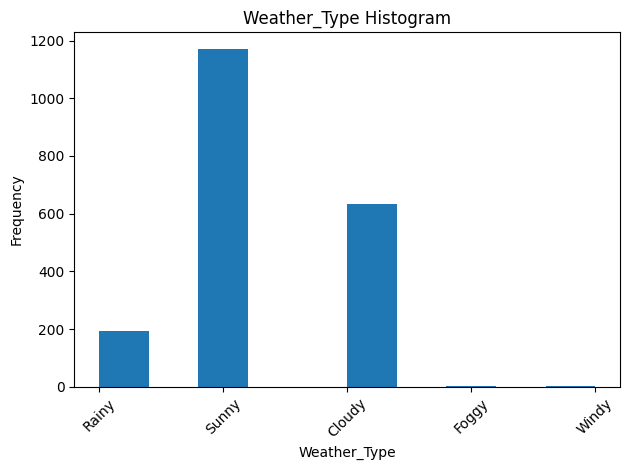

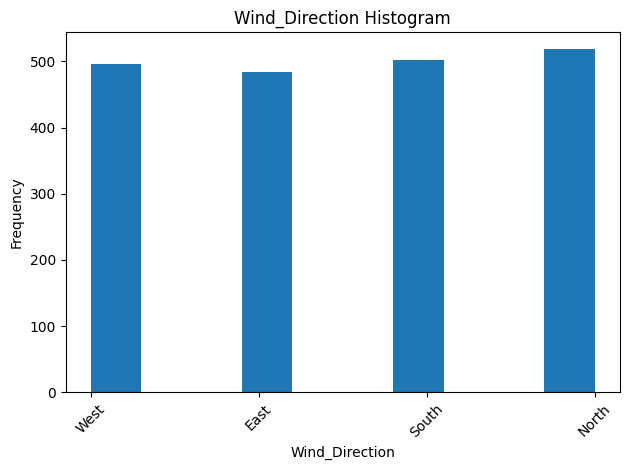

In [14]:
import matplotlib.pyplot as plt

# Plot histograms and box plots for numerical columns
numerical_columns = ['Temperature', 'Humidity', 'Precipitation', 'Wind_Speed', 'Cloud_Coverage', 'Pressure', 'UV_Index', 'Air_Quality', 'Visibility']
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Histogram
    axes[0].hist(data[column], bins=10)
    axes[0].set_title(f'{column} Histogram')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    
    # Box plot
    axes[1].boxplot(data[column])
    axes[1].set_title(f'{column} Box Plot')
    axes[1].set_ylabel(column)
    
    plt.tight_layout()
    plt.show()

# Plot histograms for string columns
string_columns = ['Weather_Type', 'Wind_Direction']
for column in string_columns:
    plt.hist(data[column])
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()